# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [6]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("UCMEAN.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

본 적 : 경상북도 월성군 내남면 망성동 163 
주 소 : 서울특별시 구로구 시흥 1동 한양아파트 11동 1107호 
성 명 : 류 시 민 생년월일 : 1959년 7월 28일 
죄 명 : 폭력행위등 처벌에 관한 법률위반 요지 

본 피고인은 1985년 4월 1일 서울지방법원 남부지원에서 폭력행위등 처벌에 관한 법률위반으로 징역 1년 6월을 선고 받고 이에 불복 다음과 같이 항소이유서를 제출합니다. 다 음 본 피고인은 우선 이 항소의 목적이 자신의 무죄를 주장하거나 1심 선고형량의 과중함을 호소하는데 있지 않다는 점을 분명히 밝혀두고자 합니다. 

이 항소는 다만 도덕적으로 보다 향상된 사회를 갈망하는 진보적 인간으로서의 의무를 다하려는 노력의 소산입니다. 또한 본 피고인은 1심 판결에 어떠한 논란거리가 내포되어 있는지 알지 못하며 알고 싶은 생각도 없습니다. 자신의 행위의 정당성을 판단하는 기준으로서 본 피고인이 관심을 두고 있는 것은 하느님이 주신 양심이라는 척도이지 인간이 만든 법률은 아니기 때문입니다. 

법률에 대한 전문지식이 없는 본 피고인으로서는 정의로운 법률이 공정하게 운용되는 사회에서라면 양심의 명령이 법률과 상호적대적인 모순관계에 서게 되는 일은 결코 일어날 수 없으리라는 소박한 믿음 위에 자신의 삶을 쌓아올릴 수밖에 없었으며 앞으로도 역시 마찬가지일 것입니다. 인간과 인간, 인간집단과 인간집단 사이에서 일어나는 모든 폭력행위는 본질적으로 그 사회의 현재의 정치적·사회적·도덕적 수준의 반영인 동시에 미래의 그것을 결정하는 규정 요인 중의 하나입니다. 

따라서 “폭력행위등 처벌에 관한 법률”(이하 폭행법이라 함) 위반 혐의로 형사소추되어 1심에서 유죄선고를 받은 본 피고인으로서는 자신이 관련된 사건이 우리 사회의 어떠한 정치적·사회적·도덕적 상태의 반영이며 또 미래의 그것에 어떠한 영향을 미칠 것인가를 규명함과 동시에 사건과 관련된 각 개인 및 집단의 윤리적 책임을 명백히 밝힐 의무가 있다고 생각합니다. 

만일 우리 사회가 젊은 대학생들이 

In [7]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. 

나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.

또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.

북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.

정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.

이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.

하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.

저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.

무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.

그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. 

저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위한 판문점 선언을 채택하고 서명하였습니다.

우리가 오늘 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [8]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['본 적 : 경상북도 월성군 내남면 망성동 163 \n주 소 : 서울특별시 구로구 시흥 1동 한양아파트 11동 1107호 \n성 명 : 류 시 민 생년월일 : 1959년 7월 28일 \n죄 명 : 폭력행위등 처벌에 관한 법률위반 요지 ',
 '본 피고인은 1985년 4월 1일 서울지방법원 남부지원에서 폭력행위등 처벌에 관한 법률위반으로 징역 1년 6월을 선고 받고 이에 불복 다음과 같이 항소이유서를 제출합니다. 다 음 본 피고인은 우선 이 항소의 목적이 자신의 무죄를 주장하거나 1심 선고형량의 과중함을 호소하는데 있지 않다는 점을 분명히 밝혀두고자 합니다. ',
 '이 항소는 다만 도덕적으로 보다 향상된 사회를 갈망하는 진보적 인간으로서의 의무를 다하려는 노력의 소산입니다. 또한 본 피고인은 1심 판결에 어떠한 논란거리가 내포되어 있는지 알지 못하며 알고 싶은 생각도 없습니다. 자신의 행위의 정당성을 판단하는 기준으로서 본 피고인이 관심을 두고 있는 것은 하느님이 주신 양심이라는 척도이지 인간이 만든 법률은 아니기 때문입니다. ',
 '법률에 대한 전문지식이 없는 본 피고인으로서는 정의로운 법률이 공정하게 운용되는 사회에서라면 양심의 명령이 법률과 상호적대적인 모순관계에 서게 되는 일은 결코 일어날 수 없으리라는 소박한 믿음 위에 자신의 삶을 쌓아올릴 수밖에 없었으며 앞으로도 역시 마찬가지일 것입니다. 인간과 인간, 인간집단과 인간집단 사이에서 일어나는 모든 폭력행위는 본질적으로 그 사회의 현재의 정치적·사회적·도덕적 수준의 반영인 동시에 미래의 그것을 결정하는 규정 요인 중의 하나입니다. ',
 '따라서 “폭력행위등 처벌에 관한 법률”(이하 폭행법이라 함) 위반 혐의로 형사소추되어 1심에서 유죄선고를 받은 본 피고인으로서는 자신이 관련된 사건이 우리 사회의 어떠한 정치적·사회적·도덕적 상태의 반영이며 또 미래의 그것에 어떠한 영향을 미칠 것인가를 규명함과 동시에 사건과 관련된 각 개인 및 집단의 윤리적 책임을 명백히 밝힐 의무가 있다고 생각합니다. ',
 

In [9]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. ',
 '나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.',
 '또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.',
 '북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.',
 '정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.',
 '이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.',
 '하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.',
 '저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.',
 '무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.',
 '그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. ',
 '저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위

In [11]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<90x2970 sparse matrix of type '<class 'numpy.int64'>'
	with 4270 stored elements in Compressed Sparse Row format>

In [10]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<24x392 sparse matrix of type '<class 'numpy.int64'>'
	with 481 stored elements in Compressed Sparse Row format>

In [12]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

2970
2970


['00경부터',
 '00까지',
 '01',
 '10',
 '10월',
 '10일간에',
 '1107호',
 '11동',
 '11월',
 '12',
 '12월',
 '12월의',
 '12일의',
 '16',
 '163',
 '17',
 '17일',
 '17폭거',
 '1959년',
 '1964',
 '1974년의',
 '1978년',
 '1979년',
 '1980년',
 '1982년',
 '1983년',
 '1985년',
 '19일',
 '1개월',
 '1년',
 '1동',
 '1심',
 '1심에서',
 '1심의',
 '1심판결에',
 '1심판결은',
 '1심판결의',
 '1일',
 '20도의',
 '21',
 '26일',
 '26일을',
 '26정변',
 '27일',
 '28일',
 '29일',
 '2년간의',
 '2월',
 '300여명의',
 '30일',
 '32개월',
 '3년을',
 '3사태',
 '3월',
 '3주간의',
 '400여명을',
 '40시간',
 '4년동안',
 '4명의',
 '4반세기에',
 '4월',
 '4일',
 '4일의',
 '500명',
 '500여년에',
 '500여명의',
 '5년간',
 '5월',
 '60만',
 '60시간',
 '65년의',
 '6개월이나',
 '6명이',
 '6월을',
 '7년',
 '7년간',
 '7년이',
 '7월',
 '7평의',
 '7회에',
 '83년',
 '9월',
 'tv',
 '主戰線',
 '原典',
 '定義',
 '幽王',
 '强者',
 '正義',
 '血史',
 '褒似',
 '가까스로',
 '가능성',
 '가능하겠습니까',
 '가능한',
 '가던',
 '가득찬',
 '가르쳐',
 '가면서',
 '가면을',
 '가스와',
 '가슴',
 '가슴속',
 '가슴을',
 '가시넝쿨이',
 '가신',
 '가열되어온',
 '가위눌린',
 '가장',
 '가지',
 '가지게',
 '가지에',
 '가진',
 '가질',
 '가짜',
 '가짜들이',
 '가짜학생',
 '가짜학생에',
 '가짜학생을',
 '가짜

In [13]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

392
392


['00경부터',
 '00까지',
 '01',
 '10',
 '10월',
 '10일간에',
 '1107호',
 '11동',
 '11월',
 '12',
 '12월',
 '12월의',
 '12일의',
 '16',
 '163',
 '17',
 '17일',
 '17폭거',
 '1959년',
 '1964',
 '1974년의',
 '1978년',
 '1979년',
 '1980년',
 '1982년',
 '1983년',
 '1985년',
 '19일',
 '1개월',
 '1년',
 '1동',
 '1심',
 '1심에서',
 '1심의',
 '1심판결에',
 '1심판결은',
 '1심판결의',
 '1일',
 '20도의',
 '21',
 '26일',
 '26일을',
 '26정변',
 '27일',
 '28일',
 '29일',
 '2년간의',
 '2월',
 '300여명의',
 '30일',
 '32개월',
 '3년을',
 '3사태',
 '3월',
 '3주간의',
 '400여명을',
 '40시간',
 '4년동안',
 '4명의',
 '4반세기에',
 '4월',
 '4일',
 '4일의',
 '500명',
 '500여년에',
 '500여명의',
 '5년간',
 '5월',
 '60만',
 '60시간',
 '65년의',
 '6개월이나',
 '6명이',
 '6월을',
 '7년',
 '7년간',
 '7년이',
 '7월',
 '7평의',
 '7회에',
 '83년',
 '9월',
 'tv',
 '主戰線',
 '原典',
 '定義',
 '幽王',
 '强者',
 '正義',
 '血史',
 '褒似',
 '가까스로',
 '가능성',
 '가능하겠습니까',
 '가능한',
 '가던',
 '가득찬',
 '가르쳐',
 '가면서',
 '가면을',
 '가스와',
 '가슴',
 '가슴속',
 '가슴을',
 '가시넝쿨이',
 '가신',
 '가열되어온',
 '가위눌린',
 '가장',
 '가지',
 '가지게',
 '가지에',
 '가진',
 '가질',
 '가짜',
 '가짜들이',
 '가짜학생',
 '가짜학생에',
 '가짜학생을',
 '가짜

In [14]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['00경부터', '00까지', '01', '10', '10월', '10일간에', '1107호', '11동', '11월', '12', '12월', '12월의', '12일의', '16', '163', '17', '17일', '17폭거', '1959년', '1964', '1974년의', '1978년', '1979년', '1980년', '1982년', '1983년', '1985년', '19일', '1개월', '1년', '1동', '1심', '1심에서', '1심의', '1심판결에', '1심판결은', '1심판결의', '1일', '20도의', '21', '26일', '26일을', '26정변', '27일', '28일', '29일', '2년간의', '2월', '300여명의', '30일', '32개월', '3년을', '3사태', '3월', '3주간의', '400여명을', '40시간', '4년동안', '4명의', '4반세기에', '4월', '4일', '4일의', '500명', '500여년에', '500여명의', '5년간', '5월', '60만', '60시간', '65년의', '6개월이나', '6명이', '6월을', '7년', '7년간', '7년이', '7월', '7평의', '7회에', '83년', '9월', 'tv', '主戰線', '原典', '定義', '幽王', '强者', '正義', '血史', '褒似', '가까스로', '가능성', '가능하겠습니까', '가능한', '가던', '가득찬', '가르쳐', '가면서', '가면을', '가스와', '가슴', '가슴속', '가슴을', '가시넝쿨이', '가신', '가열되어온', '가위눌린', '가장', '가지', '가지게', '가지에', '가진', '가질', '가짜', '가짜들이', '가짜학생', '가짜학생에', '가짜학생을', '가짜학생의', '가짜학생이', '가한', '가함으로써', '가해온', '가해져야', '가해진', '가혹한', '각인은', '각자가', '각종', '간단히', '간부들의', '간부의', '간절히', '간주하여', '간판

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가속화될', '가슴', '가운데', '가지고', '가지었습니다', '가진', '간절한', '간절히', '갈라져', '감사의', '감사합니다', '같이하고', '개선과', '개척해', '개최를', '것으로', '것을', '것이며', '것입니다', '겨레가', '겨레의', '격려를', '결과를', '결실을', '결실이', '결심을', '계시는', '고통이', '관계', '관계자', '관심과', '구체적', '국면을', '굳은', '그리고', '그의', '기다려왔습니다', '기다리는', '기대를', '기대에', '기록되지', '기쁨을', '기울이며', '기자', '기초하여', '긴밀히', '길로', '길에는', '길을', '깊은', '꿈과', '끝까지', '끝없는', '나가는', '나가면', '나가야', '나간다면', '나갈', '나는', '나아갑시다', '날들을', '남녘', '남은', '남의', '남이', '남측', '내가', '너무', '넘어', '노고를', '노력과', '노력을', '노력해', '논의하였습니다', '놓고', '놓아야', '놓음으로써', '누리게', '누리는', '다녀간', '다시', '다해', '다해준', '단합과', '단합하여', '닫겨', '대결하여', '대의를', '대책들을', '대통령과', '대통령은', '더욱', '도전을', '동족이라는', '동포', '동포들에게', '되고', '되기를', '되어', '되었습니다', '되풀이되지', '된다면', '됩니다', '드립니다', '따뜻한', '땅에서', '또한', '뜨거운', '뜻과', '마련되었던', '마음', '마음으로', '마주', '마주하고', '만남과', '만남에', '만남을', '많은', '맞이하여', '맞잡기까지', '맞추며', '맺어지도록', '맺을', '먼저', '모두', '모두는', '모든', '모아', '무겁게', '무릎을', '무엇보다도', '문도', '문재인', '문제', '문화를', '뭉클하게', '미래로', '미래를', '민족만대의', '민족의', '민족이', 

array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  4

In [16]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'00경부터': 1,
 '00까지': 1,
 '01': 1,
 '10': 1,
 '10월': 4,
 '10일간에': 1,
 '1107호': 1,
 '11동': 1,
 '11월': 1,
 '12': 2,
 '12월': 1,
 '12월의': 2,
 '12일의': 1,
 '16': 1,
 '163': 1,
 '17': 1,
 '17일': 1,
 '17폭거': 1,
 '1959년': 1,
 '1964': 1,
 '1974년의': 1,
 '1978년': 1,
 '1979년': 2,
 '1980년': 1,
 '1982년': 1,
 '1983년': 2,
 '1985년': 2,
 '19일': 1,
 '1개월': 1,
 '1년': 1,
 '1동': 1,
 '1심': 2,
 '1심에서': 1,
 '1심의': 2,
 '1심판결에': 1,
 '1심판결은': 1,
 '1심판결의': 1,
 '1일': 1,
 '20도의': 1,
 '21': 1,
 '26일': 1,
 '26일을': 1,
 '26정변': 1,
 '27일': 1,
 '28일': 2,
 '29일': 1,
 '2년간의': 1,
 '2월': 1,
 '300여명의': 1,
 '30일': 1,
 '32개월': 1,
 '3년을': 1,
 '3사태': 1,
 '3월': 2,
 '3주간의': 1,
 '400여명을': 1,
 '40시간': 1,
 '4년동안': 1,
 '4명의': 2,
 '4반세기에': 1,
 '4월': 2,
 '4일': 3,
 '4일의': 1,
 '500명': 1,
 '500여년에': 1,
 '500여명의': 1,
 '5년간': 1,
 '5월': 4,
 '60만': 1,
 '60시간': 1,
 '65년의': 1,
 '6개월이나': 1,
 '6명이': 1,
 '6월을': 1,
 '7년': 1,
 '7년간': 1,
 '7년이': 1,
 '7월': 1,
 '7평의': 1,
 '7회에': 1,
 '83년': 1,
 '9월': 8,
 'tv': 1,
 '主戰線': 1,
 '原典': 1,
 '定義': 1,
 '幽王': 1,
 '强

In [17]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가속화될': 1,
 '가슴': 2,
 '가운데': 1,
 '가지고': 1,
 '가지었습니다': 1,
 '가진': 1,
 '간절한': 1,
 '간절히': 1,
 '갈라져': 1,
 '감사의': 1,
 '감사합니다': 1,
 '같이하고': 1,
 '개선과': 1,
 '개척해': 1,
 '개최를': 1,
 '것으로': 1,
 '것을': 3,
 '것이며': 1,
 '것입니다': 5,
 '겨레가': 2,
 '겨레의': 1,
 '격려를': 1,
 '결과를': 1,
 '결실을': 1,
 '결실이': 1,
 '결심을': 1,
 '계시는': 1,
 '고통이': 1,
 '관계': 1,
 '관계자': 1,
 '관심과': 1,
 '구체적': 1,
 '국면을': 1,
 '굳은': 1,
 '그리고': 3,
 '그의': 1,
 '기다려왔습니다': 1,
 '기다리는': 1,
 '기대를': 2,
 '기대에': 1,
 '기록되지': 1,
 '기쁨을': 1,
 '기울이며': 1,
 '기자': 1,
 '기초하여': 1,
 '긴밀히': 1,
 '길로': 1,
 '길에는': 1,
 '길을': 1,
 '깊은': 1,
 '꿈과': 1,
 '끝까지': 1,
 '끝없는': 1,
 '나가는': 1,
 '나가면': 1,
 '나가야': 1,
 '나간다면': 1,
 '나갈': 2,
 '나는': 2,
 '나아갑시다': 1,
 '날들을': 1,
 '남녘': 1,
 '남은': 2,
 '남의': 1,
 '남이': 3,
 '남측': 1,
 '내가': 1,
 '너무': 1,
 '넘어': 1,
 '노고를': 1,
 '노력과': 1,
 '노력을': 1,
 '노력해': 1,
 '논의하였습니다': 1,
 '놓고': 1,
 '놓아야': 1,
 '놓음으로써': 1,
 '누리게': 1,
 '누리는': 1,
 '다녀간': 1,
 '다시': 2,
 '다해': 1,
 '다해준': 1,
 '단합과': 1,
 '단합하여': 1,
 '닫겨': 1,
 '대결하여': 1,
 '대의를': 1,
 '대책들을': 1,
 '대통령과': 1,
 '대통령은

### 시각화

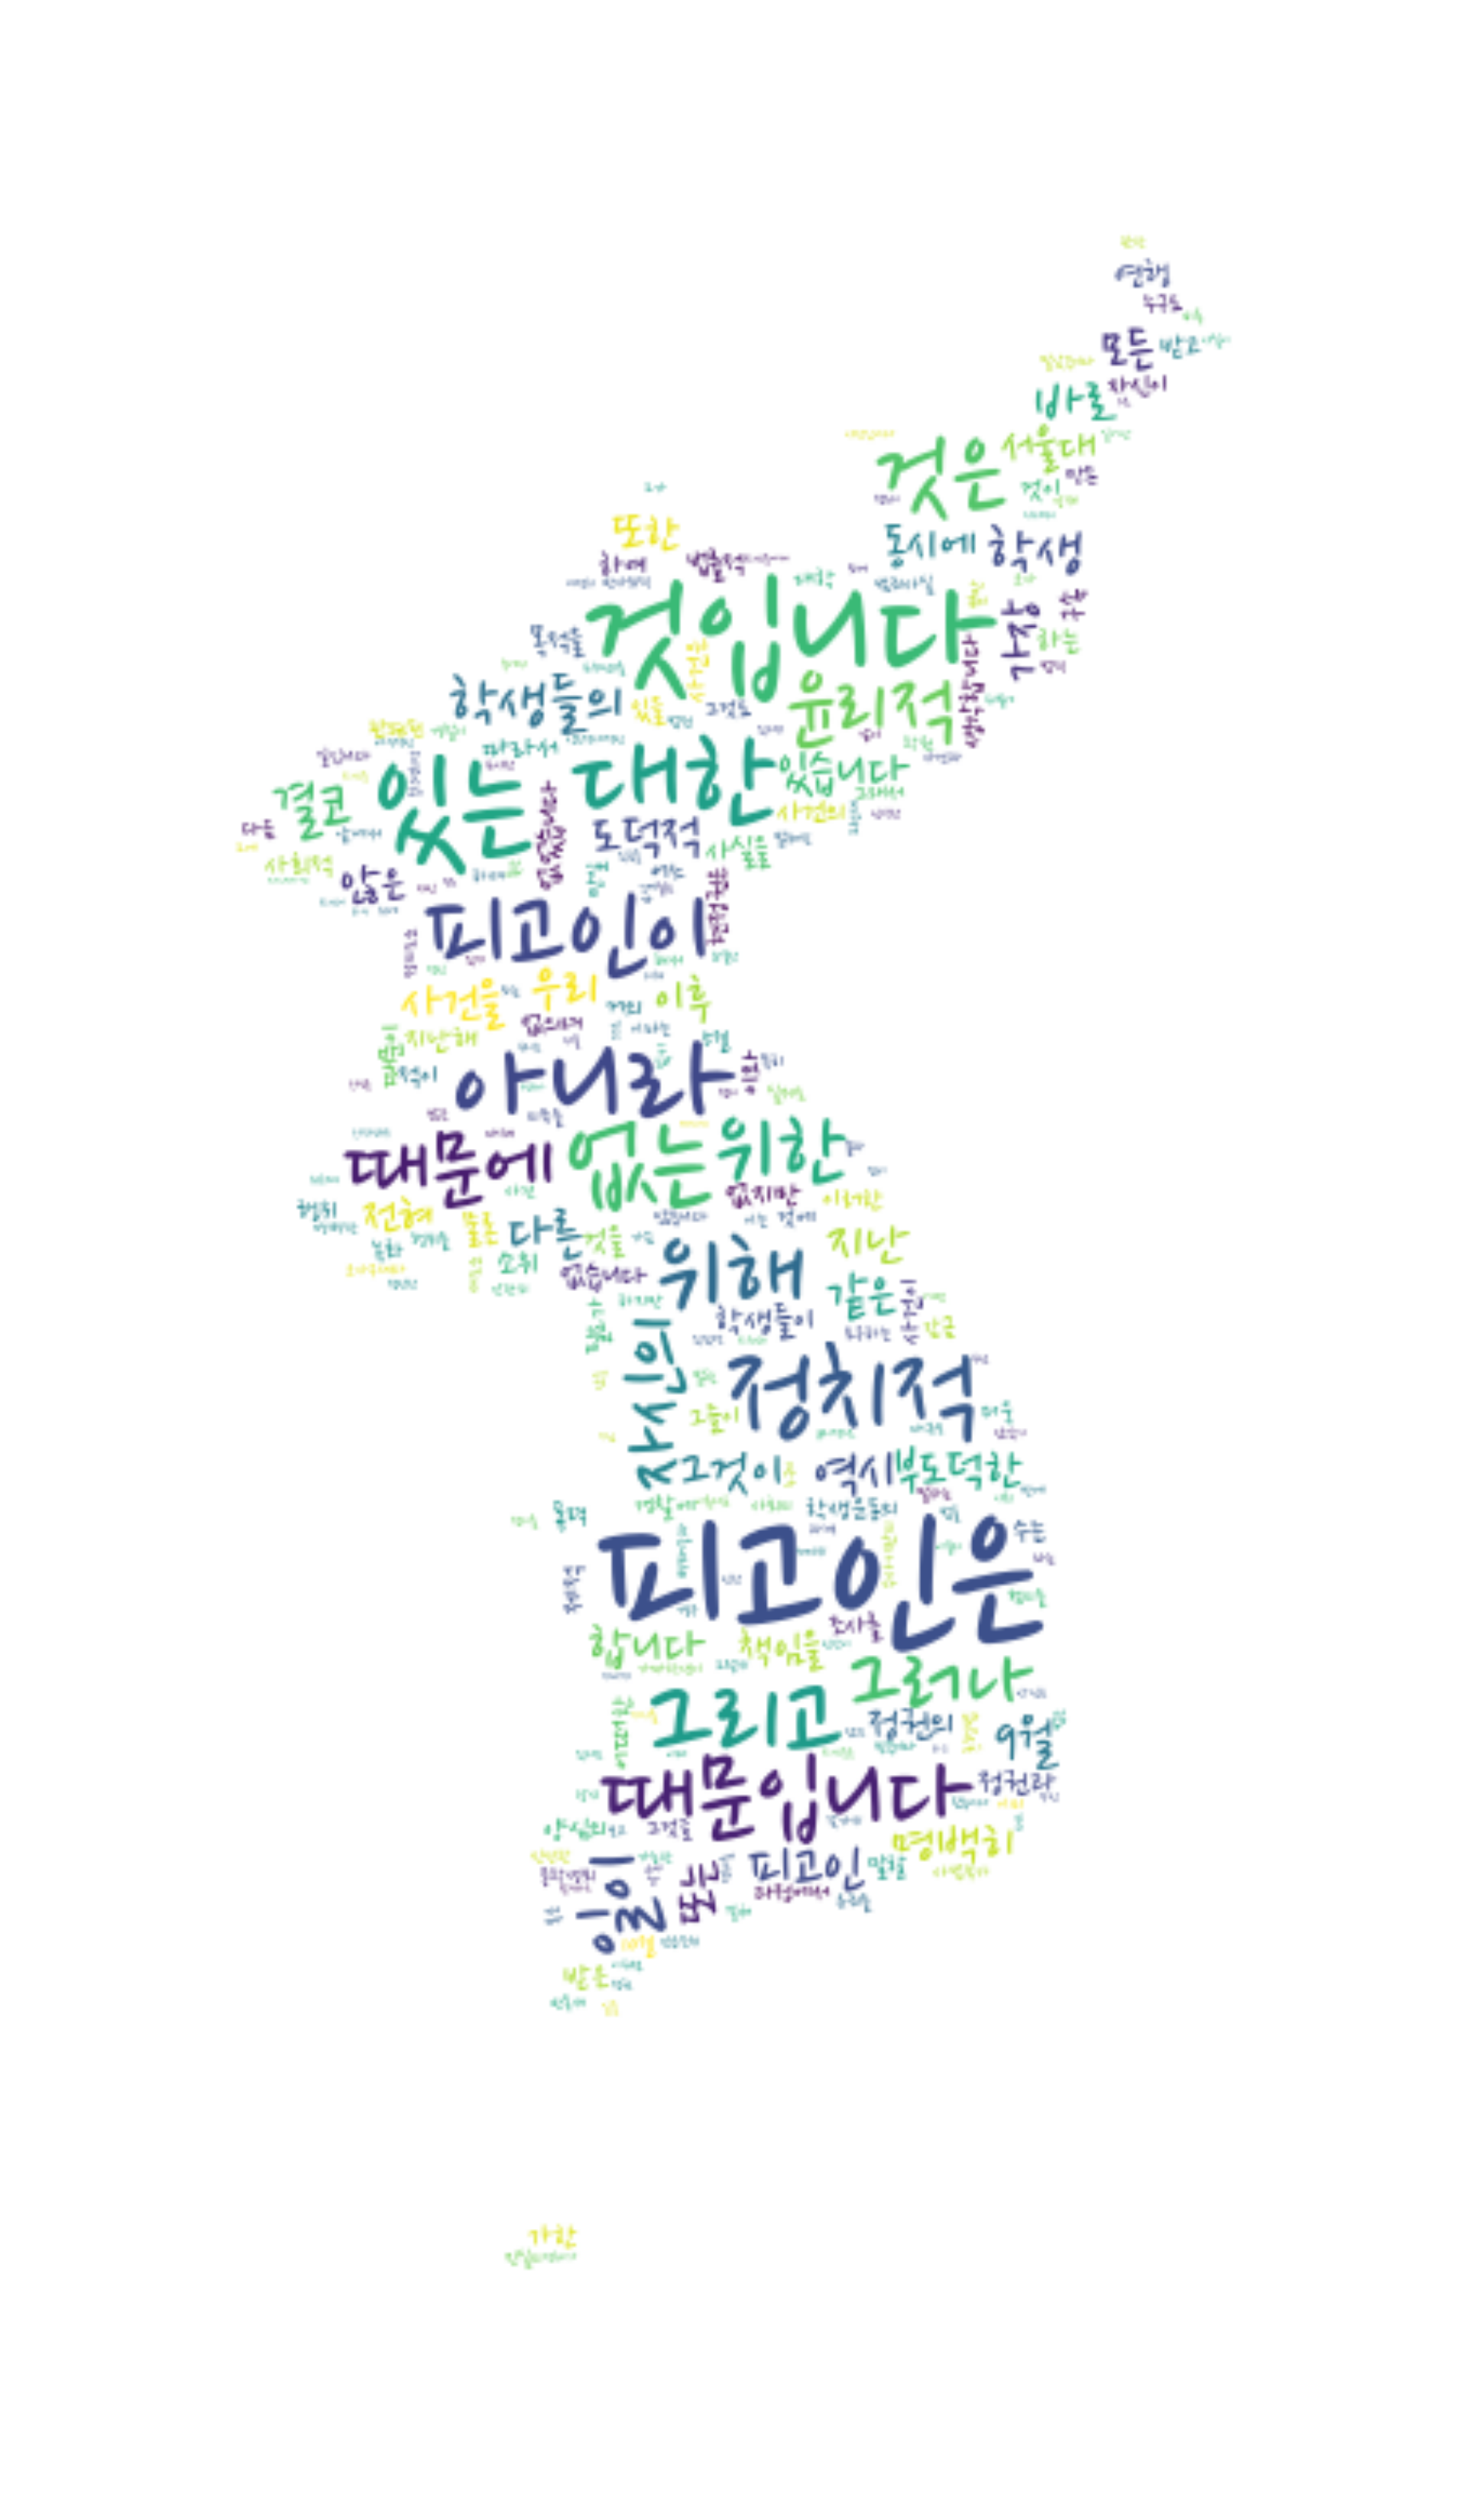

In [18]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

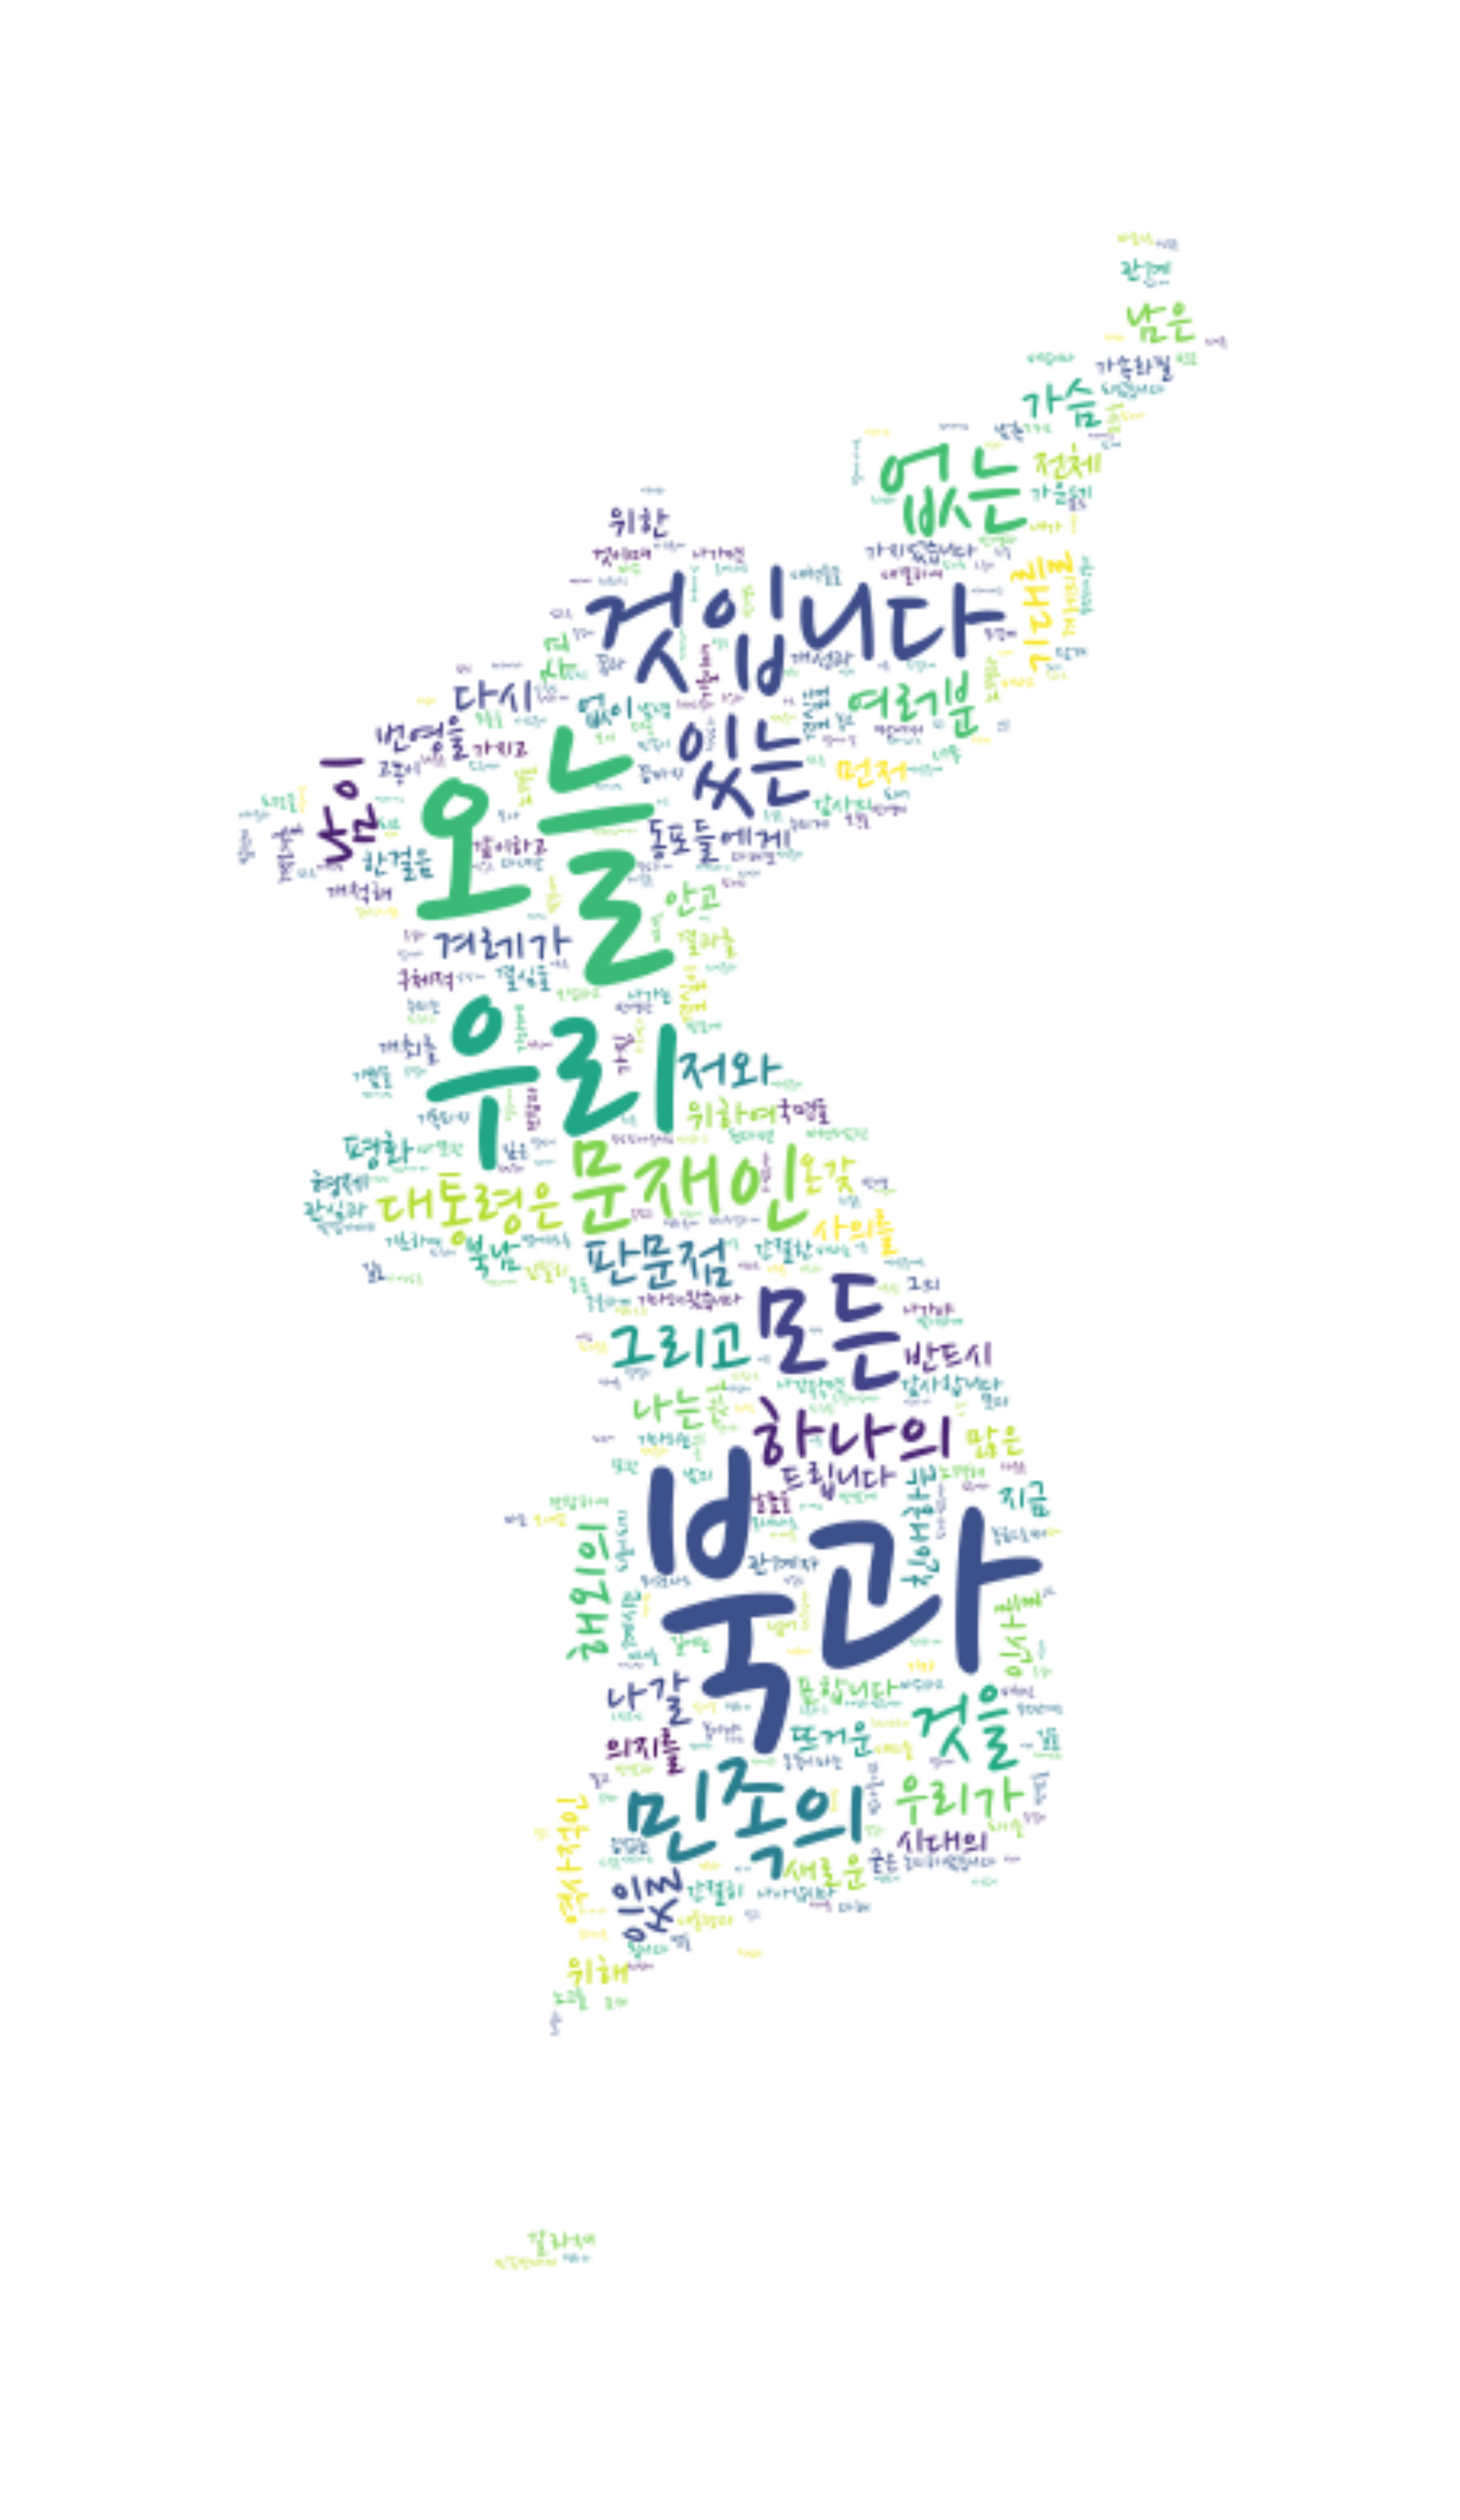

In [19]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기